In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import time
import math
import collections
import json
import spacy
import pickle as pkl
import scipy
from numpy import dot
from numpy.linalg import norm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from keras.preprocessing.text import Tokenizer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.utils import lemmatize
from wordcloud import WordCloud
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [ ]:
imdb_data = pd.read_csv('/content/drive/MyDrive/AI-Sentiment-Analysis/IMDB Dataset.csv')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
#Summary of the dataset
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
#sentiment count
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
raw_reviews = imdb_data['review']
raw_reviews

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [ ]:
# remove HTML
text_reviews = raw_reviews.apply(lambda x: strip_html(x))
text_reviews

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. The filming tec...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
# lowercase text
lowercased_reviews=text_reviews.apply(lambda x: x.lower())
lowercased_reviews

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
contractions = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "i had / i would",
"i'd've": "i would have",
"i'll": "i shall / i will",
"i'll've": "i shall have / i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
def replace_apostrophes(text):
  for word in text.split():
    if word.lower() in contractions:
        text = text.replace(word, contractions[word.lower()])
  return text

In [ ]:
# replace apostrophe/short words
contracted_reviews=lowercased_reviews.apply(lambda x: replace_apostrophes(x))
contracted_reviews

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there has / there is a family where ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i am going to have to disagree with the previo...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
# define Tokenizer and a set of stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
# remove the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [ ]:
# remove the stopwords
stopped_reviews=contracted_reviews.apply(lambda x: remove_stopwords(x, True))
stopped_reviews

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production . filming techniqu...
2        thought wonderful way spend time hot summer we...
3        basically / family little boy ( jake ) thinks ...
4        petter mattei 's `` love time money '' visuall...
                               ...                        
49995    thought movie right good job . creative origin...
49996    bad plot , bad dialogue , bad acting , idiotic...
49997    catholic taught parochial elementary schools n...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movies high art , fans e...
Name: review, Length: 50000, dtype: object

In [ ]:
def remove_special_character_tokens(text):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token.isalpha()]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [ ]:
# remove special standalone characters
alpha_reviews=stopped_reviews.apply(lambda x: remove_special_character_tokens(x))
alpha_reviews

0        one reviewers mentioned watching oz episode sh...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake thinks zombie...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 50000, dtype: object

In [ ]:
# define Lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
#!pip install pattern

In [ ]:
def lemmatize_text(text):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = []   
    for token in tokens:
      token = lemmatizer.lemmatize(token, 'v')
      token = lemmatizer.lemmatize(token, 'n')
      token = lemmatizer.lemmatize(token, 'r')
      token = lemmatizer.lemmatize(token, 'a')
      filtered_tokens.append(token)
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [ ]:
# lemmatize reviews
lemmatized_reviews=alpha_reviews.apply(lambda x: lemmatize_text(x))
lemmatized_reviews

0        one reviewer mention watch oz episode shall ho...
1        wonderful little production film technique fas...
2        think wonderful way spend time hot summer week...
3        basically family little boy jake think zombie ...
4        petter mattei love time money visually stun fi...
                               ...                        
49995    think movie right good job creative original f...
49996    bad plot bad dialogue bad act idiotic direct a...
49997    catholic teach parochial elementary school nun...
49998    go disagree previous comment side maltin one s...
49999    one expect star trek movie high art fan expect...
Name: review, Length: 50000, dtype: object

In [ ]:
# load spacy Named Entity Recognition for ENG
nlp = spacy.load("en_core_web_sm")

In [ ]:
def remove_named_entities(text):
  document = nlp(text)
  text_no_namedentities = []

  ents = [e.text for e in document.ents]
  for item in document:
      if item.text in ents:
          pass
      else:
          text_no_namedentities.append(item.text)

  return ' '.join(text_no_namedentities)

In [ ]:
#no_named_entities_reviews=lemmatized_reviews.apply(lambda x: remove_named_entities(x))
no_named_entities_reviews = lemmatized_reviews

In [ ]:
# train test split 70 / 30
y=pd.get_dummies(imdb_data['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(no_named_entities_reviews, imdb_data['sentiment'], test_size = 0.3, random_state = 1)

In [ ]:
X_train

8950     note add comment fear black hat criminal image...
38421    one bad film see date pathetic action scene re...
19363    crossfire one film forty cry remake reason may...
30157    film begin people earth discover rocket mar lo...
14294    pretty good episode though trap closet cartoon...
                               ...                        
43723    figure wyatt earp bat masterson specter george...
32511    okay penelope keith miss backbone england kill...
5192     odd willfully skew biopic dyan thomas hear lit...
12172    basic structure story begin middle structure p...
33003    set paris year retire old rich opera singer de...
Name: review, Length: 35000, dtype: object

In [ ]:
X_train.shape

(35000,)

In [ ]:
y_train.shape

(35000,)

In [ ]:
X_test.shape

(15000,)

In [ ]:
y_test.shape

(15000,)

In [ ]:
# baseline accuracy
y_train.value_counts(normalize=True)

positive    0.5006
negative    0.4994
Name: sentiment, dtype: float64

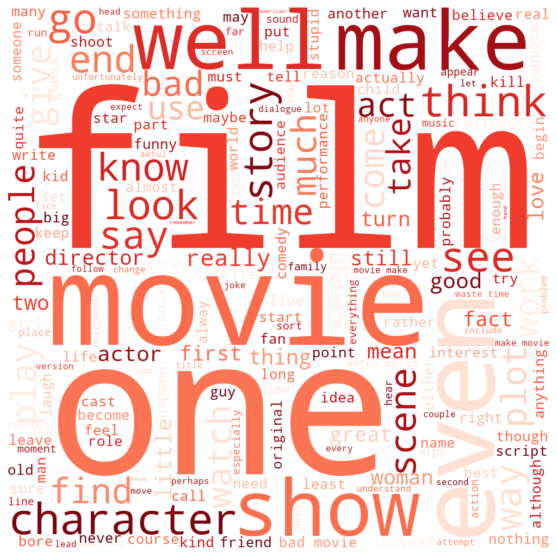

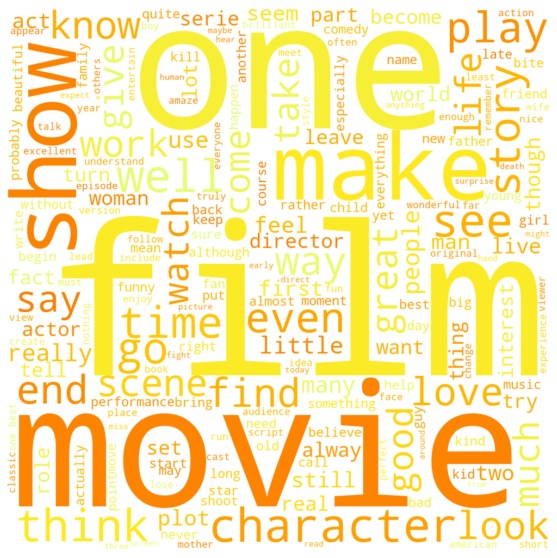

In [ ]:
# Polarity == 0 negative
train_s0 = X_train[y_train == 'negative']
all_text = ' '.join(train_s0)
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
 
# Polarity == 1 positive
train_s1 = X_train[y_train == 'positive']
all_text = ' '.join(train_s1)
wordcloud_p2 = WordCloud(width=1000, height=1000, colormap='Wistia',background_color='white', mode='RGBA').generate(all_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud_p2, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
# we experiment with 2 different vectorisers to see which one is best for the data 
# and use a logistic regression model as it is a fast and simple classifier
lr = LogisticRegression(random_state=1)

In [ ]:
# initalise the vectoriser 
tvec = TfidfVectorizer()

# fit the training data on the model
tvec.fit(X_train)

#transform training data into sparse matrix
X_train_tvec = tvec.transform(X_train)

# cross val score/ predict
tvec_score = cross_val_score(lr, X_train_tvec, y_train, cv=3)

In [ ]:
tvec_score

array([0.88797463, 0.88180338, 0.88462198])

In [ ]:
# initalise the vectoriser 
cvec = CountVectorizer()

# fit the training data on the model
cvec.fit(X_train)

#transform training data into sparse matrix
X_train_cvec = cvec.transform(X_train)

# cross val score/ predict
cvec_score = cross_val_score(lr, X_train_cvec, y_train, cv=3 )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
cvec_score

array([0.87160367, 0.86928945, 0.87210698])

In [ ]:
baseline = 0.5

In [ ]:
print('Baseline:', baseline)
print('Tfidf Vectorizer Score:', tvec_score.mean())
print('Count Vectorizer Score:', cvec_score.mean())
acc_list = []
acc_list.append(cvec_score.mean())
acc_list.append(tvec_score.mean())

# DataFrame Accuracy 
acc_df = pd.DataFrame()
acc_df['params']= ['cvec', 'tvec']
acc_df['scores']= acc_list
acc_df

Baseline: 0.5
Tfidf Vectorizer Score: 0.8847999949138138
Count Vectorizer Score: 0.8710000316270262


,params,scores
0,cvec,0.8710
1,tvec,0.8848


In [ ]:
# we make a decision to go for TF-IDF as a primary vectorizer to our data

In [ ]:
# calculate word frequencies
separated_words = all_text.split(' ')
counter=collections.Counter(separated_words)
print(counter.most_common(10))

[('film', 34767), ('movie', 30251), ('one', 18910), ('see', 14973), ('make', 14265), ('like', 13875), ('get', 11352), ('well', 11219), ('time', 10858), ('good', 10188)]


In [ ]:
X_train

8950     note add comment fear black hat criminal image...
38421    one bad film see date pathetic action scene re...
19363    crossfire one film forty cry remake reason may...
30157    film begin people earth discover rocket mar lo...
14294    pretty good episode though trap closet cartoon...
                               ...                        
43723    figure wyatt earp bat masterson specter george...
32511    okay penelope keith miss backbone england kill...
5192     odd willfully skew biopic dyan thomas hear lit...
12172    basic structure story begin middle structure p...
33003    set paris year retire old rich opera singer de...
Name: review, Length: 35000, dtype: object

In [ ]:
# upload datasets
with open("/content/drive/MyDrive/AI-Sentiment-Analysis/X_train.pkl", "wb") as f_X_train:
    pkl.dump(X_train, f_X_train)
with open("/content/drive/MyDrive/AI-Sentiment-Analysis/X_train_tvec.pkl", "wb") as f_X_train_tvec:
    pkl.dump(X_train_tvec, f_X_train_tvec)
with open("/content/drive/MyDrive/AI-Sentiment-Analysis/X_test.pkl", "wb") as f_X_test:
    pkl.dump(X_test, f_X_test)
with open("/content/drive/MyDrive/AI-Sentiment-Analysis/y_train.pkl", "wb") as f_y_train:
    pkl.dump(y_train, f_y_train)
with open("/content/drive/MyDrive/AI-Sentiment-Analysis/y_test.pkl", "wb") as f_y_test:
    pkl.dump(y_test, f_y_test)

In [ ]:
# download datasets
with open('/content/drive/MyDrive/AI-Sentiment-Analysis/X_train.pkl', 'rb') as f_X_train:
    X_train = pkl.load(f_X_train)
with open('/content/drive/MyDrive/AI-Sentiment-Analysis/X_train_tvec.pkl', 'rb') as f_X_train_tvec:
    X_train_tvec = pkl.load(f_X_train_tvec)
with open('/content/drive/MyDrive/AI-Sentiment-Analysis/X_test.pkl', 'rb') as f_X_test:
    X_test = pkl.load(f_X_test)
with open('/content/drive/MyDrive/AI-Sentiment-Analysis/y_train.pkl', 'rb') as f_y_train:
    y_train = pkl.load(f_y_train)
with open('/content/drive/MyDrive/AI-Sentiment-Analysis/y_test.pkl', 'rb') as f_y_test:
    y_test = pkl.load(f_y_test)

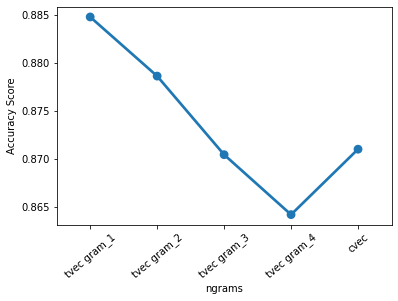

In [ ]:
def count_vec_ngram(params, X_train, y_train):
    tvec_p = TfidfVectorizer(ngram_range=(params))

    tvec_p.fit(X_train)
    X_train_tvec_p = tvec_p.transform(X_train)

    # cross val score/ predict
    tvec_score_p = cross_val_score(lr, X_train_tvec_p, y_train, cv=3)
    # cross validation 
    return tvec_score_p.mean()

params = [(1,1), (1,2),(1,3), (1,4)] 
ngram_scores = []
for p in params:
    ngram_scores.append(count_vec_ngram(p, X_train, y_train))
    
ngrams = ['tvec gram_1','tvec gram_2','tvec gram_3','tvec gram_4']
ngram_df = pd.DataFrame({'params':ngrams, 'scores':ngram_scores}, index=[0,1,2,3])

# adding tvec score with default params
ngram_df = ngram_df.append(acc_df.iloc[:1,:])

# plot scores on graph
sns.pointplot(x='params', y='scores', data =ngram_df)
plt.ylabel('Accuracy Score')
plt.xlabel('ngrams')
plt.xticks(rotation=40)
plt.show()

In [ ]:
# final TF-IDF vectorizer with optimal parameters
tv=TfidfVectorizer(min_df=0,max_df=0.25,use_idf=True,ngram_range=(1,4))

#transformed train reviews
tv_train_reviews=tv.fit_transform(X_train)

#transformed test reviews
tv_test_reviews=tv.transform(X_test)

print('TF-IDF train:',tv_train_reviews.shape)
print('TF-IDF test:',tv_test_reviews.shape)

TF-IDF train: (35000, 9351152)
TF-IDF test: (15000, 9351152)


In [ ]:
lb=LabelEncoder()
y_train_labeled = lb.fit_transform(y_train)
y_test_labeled = lb.fit_transform(y_test)
y_train_labeled

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
# NAIVE BAYES

In [ ]:
# training the Naive Bayes model

mnb=MultinomialNB()
mnb_tfidf=mnb.fit(tv_train_reviews,y_train_labeled)

print(mnb_tfidf)

MultinomialNB()


In [ ]:
tv_test_reviews.shape

(15000, 9351152)

In [ ]:
# Prediction
mnb_predict=mnb.predict(tv_test_reviews)
print(mnb_predict)

[0 0 0 ... 0 0 1]


In [ ]:
# MNB accuracy
mnb_score=accuracy_score(y_test_labeled,mnb_predict)
print("NAIVE BAYES SCORE :", mnb_score)

NAIVE BAYES SCORE : 0.8873333333333333


In [ ]:
# classification report
mnb_report=classification_report(y_test_labeled,mnb_predict,target_names=['positive','negative'])
print(mnb_report)

              precision    recall  f1-score   support

    positive       0.90      0.88      0.89      7521
    negative       0.88      0.90      0.89      7479

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(y_test_labeled,mnb_predict,labels=[1,0])
print(cm_bow)


[[6722  757]
 [ 933 6588]]


In [ ]:
# SVM

In [ ]:
# training the SVM model

svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
svm_tfidf=svm.fit(tv_train_reviews,y_train_labeled)

print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)


In [ ]:
# Prediction
svm_predict=svm.predict(tv_test_reviews)
print(svm_predict)

[0 0 0 ... 0 0 0]


In [ ]:
# accuracy score
svm_score=accuracy_score(y_test_labeled,svm_tfidf_predict)
print("SVM SCORE :",svm_score)

SVM SCORE : 0.8777333333333334


In [ ]:
# classification report
svm_report=classification_report(y_test_labeled,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_report)

              precision    recall  f1-score   support

    Positive       0.90      0.85      0.88      7521
    Negative       0.86      0.90      0.88      7479

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000



In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4944   63]
 [4204  789]]
[[5007    0]
 [4888  105]]


In [ ]:
# LSTM

In [ ]:
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(no_named_entities_reviews)
X = tokenizer.texts_to_sequences(no_named_entities_reviews)
X = pad_sequences(X)

In [ ]:
y_labeled = lb.fit_transform(imdb_data['sentiment'])
y=pd.get_dummies(y_labeled)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape

(35000, 576)

In [ ]:
#defining LSTM
model = Sequential()
model.add(Embedding(500, 120, input_length = X_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 576, 120)          60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 576, 120)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 2)                 354       
                                                                 
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
batch_size=32
model.fit(X_train, y_train, epochs = 5, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
1094/1094 [==============================] - 2795s 3s/step - loss: 0.4264 - accuracy: 0.8045
Epoch 2/5
1094/1094 [==============================] - 2815s 3s/step - loss: 0.3769 - accuracy: 0.8370
Epoch 3/5
1094/1094 [==============================] - 2844s 3s/step - loss: 0.3635 - accuracy: 0.8408
Epoch 4/5
1094/1094 [==============================] - 2801s 3s/step - loss: 0.3547 - accuracy: 0.8468
Epoch 5/5
1094/1094 [==============================] - 2795s 3s/step - loss: 0.3441 - accuracy: 0.8493


In [ ]:
model.evaluate(X_test,y_test)

469/469 [==============================] - 144s 305ms/step - loss: 0.3522 - accuracy: 0.8443


[0.3521765172481537, 0.8443333506584167]

In [ ]:
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
y_test = np.argmax(y_test)
y_test

1

In [ ]:
# CNN

In [ ]:
# define CNN model
model_CNN = Sequential()
model_CNN.add(Embedding(500, 120, input_length=X_train.shape[1]))
model_CNN.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Flatten())
model_CNN.add(Dense(10, activation='relu'))
model_CNN.add(Dense(1, activation='sigmoid'))
print(model_CNN.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 576, 120)          60000     
                                                                 
 conv1d (Conv1D)             (None, 569, 32)           30752     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 284, 32)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9088)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                90890     
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                      

In [ ]:
y_train_reshaped = y_train[0]
y_test_reshaped = y_test[0]

In [ ]:
y_test_reshaped

33553    0
9427     0
199      1
12447    0
39489    1
        ..
15168    0
49241    0
39317    1
42191    0
15109    0
Name: 0, Length: 15000, dtype: uint8

In [ ]:
y_train_reshaped.shape

(70000, 1)

In [ ]:
# compile CNN
model_CNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit CNN
model_CNN.fit(X_train, y_train_reshaped, epochs=10, verbose=2)

Epoch 1/10
1094/1094 - 139s - loss: 0.4505 - accuracy: 0.7662 - 139s/epoch - 127ms/step
Epoch 2/10
1094/1094 - 138s - loss: 0.3518 - accuracy: 0.8473 - 138s/epoch - 126ms/step
Epoch 3/10
1094/1094 - 138s - loss: 0.3319 - accuracy: 0.8575 - 138s/epoch - 126ms/step
Epoch 4/10
1094/1094 - 138s - loss: 0.3032 - accuracy: 0.8709 - 138s/epoch - 126ms/step
Epoch 5/10
1094/1094 - 137s - loss: 0.2612 - accuracy: 0.8930 - 137s/epoch - 125ms/step
Epoch 6/10
1094/1094 - 138s - loss: 0.2075 - accuracy: 0.9170 - 138s/epoch - 126ms/step
Epoch 7/10
1094/1094 - 138s - loss: 0.1474 - accuracy: 0.9449 - 138s/epoch - 126ms/step
Epoch 8/10
1094/1094 - 137s - loss: 0.0952 - accuracy: 0.9676 - 137s/epoch - 126ms/step
Epoch 9/10
1094/1094 - 137s - loss: 0.0602 - accuracy: 0.9793 - 137s/epoch - 126ms/step
Epoch 10/10
1094/1094 - 144s - loss: 0.0432 - accuracy: 0.9848 - 144s/epoch - 132ms/step


In [ ]:
y_test.shape

(15000, 2)

In [ ]:
# evaluate CNN
loss, acc = model_CNN.evaluate(X_test, y_test[0], verbose=0)

In [ ]:
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 90.739999
